In [1]:
## API funcional

In [33]:
%pylab inline
plt.style.use('seaborn-talk')
import numpy as np
from keras import layers, optimizers, losses, models
from keras.constraints import max_norm

Populating the interactive namespace from numpy and matplotlib


In [11]:
x_train = np.linspace(0,100,1000)
y_train = 3*x_train + 2

x_test = np.linspace(100.01, 110.01, 50)
y_test = 3*x_test+2

Definición secuencial de la red

In [17]:

m = models.Sequential()
m.add(layers.Dense(512, input_shape=(1,), activation='selu'))
m.add(layers.Dense(256, activation='selu'))
m.add(layers.Dense(512,  activation='selu'))
m.add(layers.Dense(64,  activation='selu'))
m.add(layers.Dense(512,  activation='selu'))
m.add(layers.Dense(4,  activation='selu'))
m.add(layers.Dense(1, activation='selu'))

In [18]:
m.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 512)               1024      
_________________________________________________________________
dense_15 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_16 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_17 (Dense)             (None, 64)                32832     
_________________________________________________________________
dense_18 (Dense)             (None, 512)               33280     
_________________________________________________________________
dense_19 (Dense)             (None, 4)                 2052      
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 5         
Total para

definimos la misma red de forma funcional

In [21]:
x0 = layers.Input(shape=(1,), dtype = 'float32')
x1 = layers.Dense(512, activation='selu')(x0)
x2 = layers.Dense(256, activation='selu')(x1)
x3 = layers.Dense(512, activation='selu')(x2)
x4 = layers.Dense(64, activation='selu')(x3)
x5 = layers.Dense(512, activation='selu')(x4)
x6 = layers.Dense(4, activation='selu')(x5)
x7 = layers.Dense(1, activation='selu')(x6)

model = models.Model(inputs = x0, outputs = x7)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 1)                 0         
_________________________________________________________________
dense_29 (Dense)             (None, 512)               1024      
_________________________________________________________________
dense_30 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_31 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_32 (Dense)             (None, 64)                32832     
_________________________________________________________________
dense_33 (Dense)             (None, 512)               33280     
_________________________________________________________________
dense_34 (Dense)             (None, 4)                 2052      
__________

Supongamos que queremos que la capa x4 tome como entrada la salida de x3 y de x2. Esto se hace con `keras.concatenate`, que construye una capa concatenando los outputs de otras capas, inputs externos, etc en un solo vector. Esto no es posible con el modelo secuencial

In [21]:
x0 = layers.Input(shape=(1,), dtype = 'float32')
x1 = layers.Dense(512, activation='selu')(x0)
x2 = layers.Dense(256, activation='selu')(x1)
x3 = layers.Dense(512, activation='selu')(x2)
x4_input = layers.Concatenate([x2, x3])
x4 = layers.Dense(64, activation='selu')(x4_input)
x5 = layers.Dense(512, activation='selu')(x4)
x6 = layers.Dense(4, activation='selu')(x5)
x7 = layers.Dense(1, activation='selu')(x6)

model = models.Model(inputs = x0, outputs = x7)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 1)                 0         
_________________________________________________________________
dense_29 (Dense)             (None, 512)               1024      
_________________________________________________________________
dense_30 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_31 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_32 (Dense)             (None, 64)                32832     
_________________________________________________________________
dense_33 (Dense)             (None, 512)               33280     
_________________________________________________________________
dense_34 (Dense)             (None, 4)                 2052      
__________

Vamos a hacer una aproximación de la función coseno mediante un polinomio de orden 3.


In [69]:
# Capas de entrada
x1_0 = layers.Input(shape=(1,), dtype = 'float32', name = 'linear_input')
x2_0 = layers.Input(shape=(1,), dtype = 'float32', name = 'cuadratic_input')
x3_0 = layers.Input(shape=(1,), dtype = 'float32', name = 'cubic_input')
x4_0 = layers.Input(shape=(1,), dtype = 'float32', name = 'power4_input')

#bloque lineal
x1_1 = layers.Dense(64, activation='selu', kernel_constraint=max_norm(5.))(x1_0)
x1_2 = layers.Dense(32, activation='selu', kernel_constraint=max_norm(3.))(x1_1)
x1_3 = layers.Dense(16, activation='selu', kernel_constraint=max_norm(2.))(x1_2)
x1_4 = layers.Dense(8, activation='selu', kernel_constraint=max_norm(1.))(x1_3)

#bloque cuadratico
x2_1 = layers.Dense(64, activation='selu', kernel_constraint=max_norm(5.))(x2_0)
x2_2 = layers.Dense(32, activation='selu', kernel_constraint=max_norm(3.))(x2_1)
x2_3 = layers.Dense(16, activation='selu', kernel_constraint=max_norm(2.))(x2_2)
x2_4 = layers.Dense(8, activation='selu', kernel_constraint=max_norm(1.))(x2_3)

#bloque cubico

x3_1 = layers.Dense(64, activation='selu', kernel_constraint=max_norm(5.))(x3_0)
x3_2 = layers.Dense(32, activation='selu', kernel_constraint=max_norm(3.))(x3_1)
x3_3 = layers.Dense(16, activation='selu', kernel_constraint=max_norm(2.))(x3_2)
x3_4 = layers.Dense(8, activation='selu', kernel_constraint=max_norm(1.))(x3_3)

#bloque cuadratico

x4_1 = layers.Dense(64, activation='selu', kernel_constraint=max_norm(5.))(x4_0)
x4_2 = layers.Dense(32, activation='selu', kernel_constraint=max_norm(3.))(x4_1)
x4_3 = layers.Dense(16, activation='selu', kernel_constraint=max_norm(2.))(x4_2)
x4_4 = layers.Dense(8, activation='selu', kernel_constraint=max_norm(1.))(x4_3)


# concatenate
x123 = layers.concatenate([x1_4, x2_4, x3_4, x4_4])

x5 = layers.Dense(64, activation = 'selu')(x123)
x6 = layers.Dense(32, activation = 'selu')(x5)
x7 = layers.Dense(16, activation = 'selu')(x6)
x8 = layers.Dense(8, activation = 'selu')(x7)
x_out = layers.Dense(1, activation = 'tanh')(x8) # nos da salida en (-1,1), que para aproximar el coseno es lo que queremos

model = models.Model(inputs = [x1_0, x2_0, x3_0, x4_0], outputs = x_out)
model.summary()


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
linear_input (InputLayer)       (None, 1)            0                                            
__________________________________________________________________________________________________
cuadratic_input (InputLayer)    (None, 1)            0                                            
__________________________________________________________________________________________________
cubic_input (InputLayer)        (None, 1)            0                                            
__________________________________________________________________________________________________
power4_input (InputLayer)       (None, 1)            0                                            
__________________________________________________________________________________________________
dense_149 

In [70]:
model.compile(optimizer=optimizers.rmsprop(), loss=losses.mae)

In [72]:
# Datos de training
f = lambda x: cos(x)
x_train = linspace(-2*np.pi, 1.5*np.pi,10000)
x_train_norm = (x_train-x_train.mean())/(x_train.std())

data_x = [x_train_norm,
         x_train_norm**2,
         x_train_norm**3,
         x_train_norm**4]

y_train = f(x_train)
y_train_norm = (y_train-y_train.mean())/(y_train.std())

h = model.fit(data_x, [y_train_norm], batch_size = 500, epochs = 100, validation_split=.2)



Train on 8000 samples, validate on 2000 samples
Epoch 1/100
8000/8000 [==============================] - 1s 160us/step - loss: 0.3973 - val_loss: 0.5573
Epoch 2/100
8000/8000 [==============================] - 0s 14us/step - loss: 0.2643 - val_loss: 0.8322
Epoch 3/100
8000/8000 [==============================] - 0s 12us/step - loss: 0.2562 - val_loss: 0.8255
Epoch 4/100
8000/8000 [==============================] - 0s 11us/step - loss: 0.2539 - val_loss: 0.5821
Epoch 5/100
8000/8000 [==============================] - 0s 11us/step - loss: 0.2457 - val_loss: 0.2880
Epoch 6/100
8000/8000 [==============================] - 0s 11us/step - loss: 0.2367 - val_loss: 0.3398
Epoch 7/100
8000/8000 [==============================] - 0s 11us/step - loss: 0.2410 - val_loss: 0.1949
Epoch 8/100
8000/8000 [==============================] - 0s 11us/step - loss: 0.2347 - val_loss: 0.3095
Epoch 9/100
8000/8000 [==============================] - 0s 11us/step - loss: 0.2275 - val_loss: 0.1885
Epoch 10/100
80

In [73]:

x_test = linspace(1.51*pi,2.5*pi,50)
x_test_norm = (x_test -x_test.mean())/(x_test.std())
y_test = f(x_test)
y_test_norm = (y_test-y_train.mean())/(y_test.std())

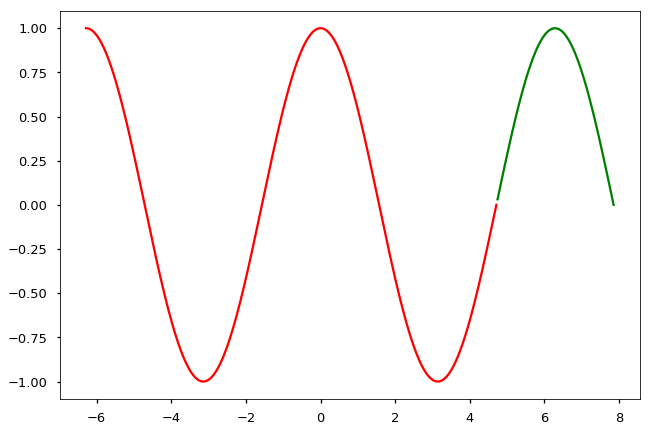

In [74]:
plt.plot(x_train, y_train, 'r')
plt.plot(x_test, y_test, 'g')

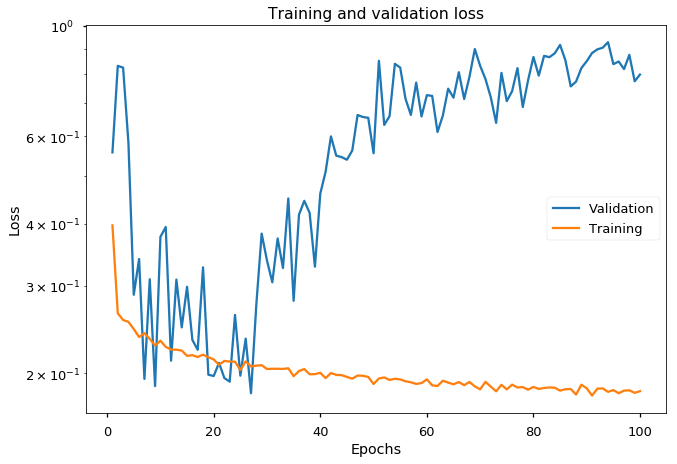

In [75]:
# Ajuste de la red
def plot_metric(history, metric):
    history_dict = history.history
    values = history_dict[metric]
    if 'val_' + metric in history_dict.keys():  
        val_values = history_dict['val_' + metric]

    epochs = range(1, len(values) + 1)

    if 'val_' + metric in history_dict.keys():  
        plt.plot(epochs, val_values, label='Validation')
    plt.semilogy(epochs, values, label='Training')

    if 'val_' + metric in history_dict.keys():  
        plt.title('Training and validation %s' % metric)
    else:
        plt.title('Training %s' % metric)
    plt.xlabel('Epochs')
    plt.ylabel(metric.capitalize())
    plt.legend()

    plt.show()  
plot_metric(h, 'loss')

In [77]:

data_x_test = [x_test_norm,
         x_test_norm**2,
         x_test_norm**3,
         x_test_norm**4
]

model.evaluate(data_x_test, y_test_norm)

50/50 [==============================] - 0s 180us/step


2.343479747772217

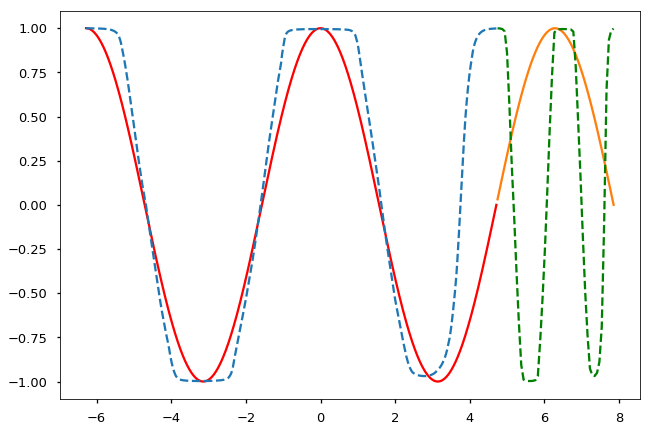

In [79]:
plt.plot(x_train, y_train, 'r')
plt.plot(x_train, model.predict(data_x), '--')
plt.plot(x_test, y_test)
plt.plot(x_test, model.predict(data_x_test), 'g--')

In [52]:
data_x_test

[array([1.74177405, 1.76176891, 1.78176377, 1.80175862, 1.82175348,
        1.84174833, 1.86174319, 1.88173804, 1.9017329 , 1.92172775,
        1.94172261, 1.96171746, 1.98171232, 2.00170717, 2.02170203,
        2.04169688, 2.06169174, 2.08168659, 2.10168145, 2.1216763 ,
        2.14167116, 2.16166601, 2.18166087, 2.20165572, 2.22165058,
        2.24164544, 2.26164029, 2.28163515, 2.30163   , 2.32162486,
        2.34161971, 2.36161457, 2.38160942, 2.40160428, 2.42159913,
        2.44159399, 2.46158884, 2.4815837 , 2.50157855, 2.52157341,
        2.54156826, 2.56156312, 2.58155797, 2.60155283, 2.62154768,
        2.64154254, 2.66153739, 2.68153225, 2.70152711, 2.72152196]),
 array([3.03377686, 3.10382969, 3.17468211, 3.24633413, 3.31878573,
        3.39203691, 3.46608769, 3.54093806, 3.61658801, 3.69303755,
        3.77028668, 3.8483354 , 3.92718371, 4.0068316 , 4.08727909,
        4.16852616, 4.25057282, 4.33341907, 4.41706491, 4.50151034,
        4.58675535, 4.67279996, 4.75964415, 4.